In [1]:
####################################################################################
# Practica con Path                                                                #
# PATH  #                                                                          #
# 03/12/2023. Hecho por: David Castillo  - Campus Agramonte                        #
# https://www.kaggle.com/code/deepak525/dementia-classification-compare-classifiers#
# BDD_Longitudinal                                                                 #
####################################################################################
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
import os

# Especificar el directorio al que deseas cambiar
#directory = "/ruta/al/directorio"
directory = "C:/RESPALDOS/Investigación/Artículos/Articulo8/BDD/DataSets/BDD0"

# Cambiar al directorio especificado
os.chdir(directory)

# Verificar el directorio actual
current_directory = os.getcwd()
print("Directorio actual:", current_directory)

Directorio actual: C:\RESPALDOS\Investigación\Artículos\Articulo8\BDD\DataSets\BDD0


In [3]:
import pandas as pd
# Cargar el archivo CSV
filename = "BDD_Sectional.csv"
data = pd.read_csv(filename)
# Procesar los datos
# Por ejemplo, imprimir las primeras filas
print(data.head())

  ID;M/F;Hand;Age;Educ;SES;MMSE;CDR;eTIV;nWBV;ASF;Delay
0  OAS1_0001_MR1;F;R;74;2;3;29;0;1344;0.743;1.306...   
1  OAS1_0002_MR1;F;R;55;4;1;29;0;1147;0.81;1.531;N/A   
2  OAS1_0003_MR1;F;R;73;4;3;27;0.5;1454;0.708;1.2...   
3      OAS1_0004_MR1;M;R;28;;;;;1588;0.803;1.105;N/A   
4       OAS1_0005_MR1;M;R;18;;;;;1737;0.848;1.01;N/A   


In [5]:
print("Tota Rows and Columns (Rows,Columns) : ",data.shape)
#print first five rows of the dataset
data.head(10)

Tota Rows and Columns (Rows,Columns) :  (436, 1)


,ID;M/F;Hand;Age;Educ;SES;MMSE;CDR;eTIV;nWBV;ASF;Delay
0,OAS1_0001_MR1;F;R;74;2;3;29;0;1344;0.743;1.306...
1,OAS1_0002_MR1;F;R;55;4;1;29;0;1147;0.81;1.531;N/A
2,OAS1_0003_MR1;F;R;73;4;3;27;0.5;1454;0.708;1.2...
3,OAS1_0004_MR1;M;R;28;;;;;1588;0.803;1.105;N/A
4,OAS1_0005_MR1;M;R;18;;;;;1737;0.848;1.01;N/A
5,OAS1_0006_MR1;F;R;24;;;;;1131;0.862;1.551;N/A
6,OAS1_0007_MR1;M;R;21;;;;;1516;0.83;1.157;N/A
7,OAS1_0009_MR1;F;R;20;;;;;1505;0.843;1.166;N/A
8,OAS1_0010_MR1;M;R;74;5;2;30;0;1636;0.689;1.073...
9,OAS1_0011_MR1;F;R;52;3;2;30;0;1321;0.827;1.329...


In [6]:
# Obtener información sobre los datos del archivo
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 436 entries, 0 to 435
Data columns (total 1 columns):
 #   Column                                                 Non-Null Count  Dtype 
---  ------                                                 --------------  ----- 
 0   ID;M/F;Hand;Age;Educ;SES;MMSE;CDR;eTIV;nWBV;ASF;Delay  436 non-null    object
dtypes: object(1)
memory usage: 3.5+ KB


In [7]:
# Obtener información sobre los datos del archivo
description = data
# (Aquí puedes proporcionar una descripción de la base de datos)
# Imprimir la descripción
print(description)

    ID;M/F;Hand;Age;Educ;SES;MMSE;CDR;eTIV;nWBV;ASF;Delay
0    OAS1_0001_MR1;F;R;74;2;3;29;0;1344;0.743;1.306...   
1    OAS1_0002_MR1;F;R;55;4;1;29;0;1147;0.81;1.531;N/A   
2    OAS1_0003_MR1;F;R;73;4;3;27;0.5;1454;0.708;1.2...   
3        OAS1_0004_MR1;M;R;28;;;;;1588;0.803;1.105;N/A   
4         OAS1_0005_MR1;M;R;18;;;;;1737;0.848;1.01;N/A   
..                                                 ...   
431        OAS1_0285_MR2;M;R;20;;;;;1469;0.847;1.195;2   
432        OAS1_0353_MR2;M;R;22;;;;;1684;0.79;1.042;40   
433       OAS1_0368_MR2;M;R;22;;;;;1580;0.856;1.111;89   
434         OAS1_0379_MR2;F;R;20;;;;;1262;0.861;1.39;2   
435       OAS1_0395_MR2;F;R;26;;;;;1283;0.834;1.368;39   

[436 rows x 1 columns]


In [8]:
import pandas as pd
import seaborn as sns
import numpy as np

# Crear un DataFrame con las características y etiquetas
#df = pd.DataFrame(np.column_stack((features.values, labels.values)), columns=['Age','EDUC','SES','MMSE','CDR','eTIV','nWBV','ASF','Group'])
#df = pd.DataFrame(labels, columns=features)
#df["Group"] = pd.Series(features)

# Crear el DataFrame a partir de los datos
df = pd.DataFrame(data)
df.info()
# Agregar la columna "class" al DataFrame
df["Group"] = pd.Series(['Age','Educ','SES','MMSE','CDR','eTIV','nWBV','ASF'])  # Reemplaza 'tus_datos_target' con los datos de tus etiquetas de clase
#df["Group"] = df["Group"]
sns.pairplot(df, hue="Group", palette="tab10")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 436 entries, 0 to 435
Data columns (total 1 columns):
 #   Column                                                 Non-Null Count  Dtype 
---  ------                                                 --------------  ----- 
 0   ID;M/F;Hand;Age;Educ;SES;MMSE;CDR;eTIV;nWBV;ASF;Delay  436 non-null    object
dtypes: object(1)
memory usage: 3.5+ KB


ValueError: figure size must be positive finite not (0.0, 0.0)

In [49]:
from pylab import rcParams
import pandas as pd
rcParams['figure.figsize'] = 8,5
#cols = ['Age','MR Delay', 'EDUC', 'SES', 'MMSE', 'CDR','eTIV','nWBV','ASF']
cols = ['Age','Educ', 'SES', 'MMSE', 'CDR','eTIV','nWBV','ASF']
df = pd.DataFrame(data)
#df.info()
x=df.fillna('')
sns_plot = sns.pairplot(x[cols])

KeyError: "None of [Index(['Age', 'Educ', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV', 'ASF'], dtype='object')] are in the [columns]"

In [30]:
data.isna().sum()

ID               0
Group            0
M/F              0
Hand             0
Age              0
Educ             0
SES              0
MMSE             0
CDR              0
eTIV             0
nWBV             0
ASF              0
Delay            0
Group_encoder    0
dtype: int64

In [31]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

data = pd.read_csv(filename)

# Crear una instancia del codificador de etiquetas
label_encoder = LabelEncoder()

data['Group'] = data['Group'].replace({0: 'Converted', 1: 'Demented', 2: 'Nondemented'})
data['Group_encoder'] = label_encoder.fit_transform(data['Group'])
print(data)

data = data.fillna(data.mean())  # Reemplazar valores faltantes con la media

features = data[['Age', 'Educ', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV', 'ASF']]  # Reemplaza 'caracteristica1', 'caracteristica2', etc. por los nombres reales de las características en tu base de datos
labels = data['Group_encoder']  # Reemplaza 'etiqueta' por el nombre real de la columna de etiquetas en tu base de datos

features = features.astype(int)
#features = features.astypeint(float())
#int(float())

                ID        Group M/F Hand  Age  Educ  SES  MMSE  CDR  eTIV  \
0    OAS1_0001_MR1  Nondemented   F    R   74   2.0  3.0  29.0  0.0  1344   
1    OAS1_0002_MR1  Nondemented   F    R   55   4.0  1.0  29.0  0.0  1147   
2    OAS1_0003_MR1     Demented   F    R   73   4.0  3.0  27.0  0.5  1454   
3    OAS1_0004_MR1     Demented   M    R   28   NaN  NaN   NaN  NaN  1588   
4    OAS1_0005_MR1     Demented   M    R   18   NaN  NaN   NaN  NaN  1737   
..             ...          ...  ..  ...  ...   ...  ...   ...  ...   ...   
431  OAS1_0285_MR2    Converted   M    R   20   NaN  NaN   NaN  NaN  1469   
432  OAS1_0353_MR2    Converted   M    R   22   NaN  NaN   NaN  NaN  1684   
433  OAS1_0368_MR2     Demented   M    R   22   NaN  NaN   NaN  NaN  1580   
434  OAS1_0379_MR2     Demented   F    R   20   NaN  NaN   NaN  NaN  1262   
435  OAS1_0395_MR2  Nondemented   F    R   26   NaN  NaN   NaN  NaN  1283   

      nWBV    ASF  Delay  Group_encoder  
0    0.743  1,306    NaN         

AttributeError: 'DataFrame' object has no attribute 'astypeint'

In [29]:
import cudf
import numpy as np
df = cudf.DataFrame({"x": (np.arange(4) // 2).astype(float)})
df.astype(int)

ModuleNotFoundError: No module named 'cudf'

In [27]:
# Convertir las características y las etiquetas a arrays de NumPy
features_array = np.array(features)
labels_array = np.array(labels)

In [28]:
from sklearn.preprocessing import MinMaxScaler
features = MinMaxScaler().fit_transform(features)

ValueError: could not convert string to float: '1,306'

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from qiskit.utils import algorithm_globals
from sklearn.preprocessing import LabelEncoder

# Cargar la base de datos desde un archivo CSV
data = pd.read_csv(filename)

# Eliminar filas con valores faltantes
#data = data.dropna()

# Crear una instancia del codificador de etiquetas
label_encoder = LabelEncoder()

data['Group'] = data['Group'].replace({0: 'Converted', 1: 'Demented', 2: 'Nondemented'})
data['Group_encoder'] = label_encoder.fit_transform(data['Group'])
print(data)

data = data.fillna(data.mean())  # Reemplazar valores faltantes con la media

# Dividir los datos en características (X=Features) y etiquetas (y=Labels)
#X = data.drop(['Age', 'EDUC', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV', 'ASF'], axis=1)  # features = data.drop("etiqueta", axis=1)
#y = data["Group"]               # labels = data["etiqueta"]

features = data[['Age', 'EDUC', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV', 'ASF']]  # Reemplaza 'caracteristica1', 'caracteristica2', etc. por los nombres reales de las características en tu base de datos
labels = data['Group_encoder']  # Reemplaza 'etiqueta' por el nombre real de la columna de etiquetas en tu base de datos

features = features.astype(int)
#features = features.round(2)

# Convertir las características y las etiquetas a arrays de NumPy
features_array = np.array(features)
labels_array = np.array(labels)


# Dividir los datos en conjuntos de entrenamiento y prueba
#train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size=0.2, random_state=42)
train_features, test_features, train_labels, test_labels = train_test_split(features_array, labels_array, train_size=0.8, random_state=algorithm_globals.random_seed)

#train_features = train_features.astype(int)
#train_features, test_features, train_labels, test_labels = train_test_split(features_array, labels_array, train_size=0.8, random_state=42)

# Imprimir los valores de los conjuntos de entrenamiento y prueba
print("train_features:", train_features)
print("test_features:", test_features)
print("train_labels:", train_labels)
print("test_labels:", test_labels)


In [12]:
#data.replace(0, np.nan, inplace=True)
import pandas as pd
from sklearn.preprocessing import LabelEncoder

#features = data[['Age', 'EDUC', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV', 'ASF']]  # Reemplaza 'caracteristica1', 'caracteristica2', etc. por los nombres reales de las características en tu base de datos
#labels = data['Group']  # Reemplaza 'etiqueta' por el nombre real de la columna de etiquetas en tu base de datos
# Crear un DataFrame de ejemplo
#data = pd.DataFrame({'Group': ['Nondemented', 'Demented', 'Converted']})
#data = pd.DataFrame({'Fruit': ['Apple', 'Banana', 'Orange', 'Apple', 'Orange']})

data = pd.read_csv(filename)

# Crear una instancia del codificador de etiquetas
label_encoder = LabelEncoder()

# Definir el diccionario de mapeo
#mapping = {'Nondemented': 0, 'Demented': 1, 'Converted': 2}
# Aplicar la codificación a la columna "Group"
#data['Group'] = data['Group'].map(mapping)

# Aplicar la codificación a la columna "Group"
#data['Group'] = label_encoder.fit_transform(data['Group'])
#data['Group_encoder'] = data['Group'].map({'Nondemented':0, 'Demented':1, 'Converted':2})

data['Group'] = data['Group'].replace({0: 'Converted', 1: 'Demented', 2: 'Nondemented'})
data['Group_encoder'] = label_encoder.fit_transform(data['Group'])
print(data)



features = data[['Age', 'EDUC', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV', 'ASF']]  # Reemplaza 'caracteristica1', 'caracteristica2', etc. por los nombres reales de las características en tu base de datos
labels = data['Group_encoder']  # Reemplaza 'etiqueta' por el nombre real de la columna de etiquetas en tu base de datos

# Convertir las características y las etiquetas a arrays de NumPy
features_array = np.array(features)
labels_array = np.array(labels)



    Subject ID         MRI ID        Group  Visit  MR Delay M/F Hand  Age  \
0    OAS2_0001  OAS2_0001_MR1  Nondemented      1         0   M    R   87   
1    OAS2_0001  OAS2_0001_MR2  Nondemented      2       457   M    R   88   
2    OAS2_0002  OAS2_0002_MR1     Demented      1         0   M    R   75   
3    OAS2_0002  OAS2_0002_MR2     Demented      2       560   M    R   76   
4    OAS2_0002  OAS2_0002_MR3     Demented      3      1895   M    R   80   
..         ...            ...          ...    ...       ...  ..  ...  ...   
368  OAS2_0185  OAS2_0185_MR2     Demented      2       842   M    R   82   
369  OAS2_0185  OAS2_0185_MR3     Demented      3      2297   M    R   86   
370  OAS2_0186  OAS2_0186_MR1  Nondemented      1         0   F    R   61   
371  OAS2_0186  OAS2_0186_MR2  Nondemented      2       763   F    R   63   
372  OAS2_0186  OAS2_0186_MR3  Nondemented      3      1608   F    R   65   

     EDUC  SES  MMSE  CDR  eTIV   nWBV    ASF  Group_encoder  
0      14  2

In [13]:
#print(data.head())
#print(data.info())
#print(description)
#data["Group"].isnull().sum()

In [14]:
#pd.set_option('display.max_rows', None)  # Configurar para mostrar todas las filas
#print(data)  # Imprimir el DataFrame completo

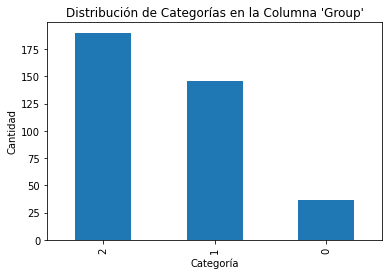

In [13]:
import matplotlib.pyplot as plt
#0: 'Converted', 1: 'Demented', 2: 'Nondemented'  
#Puedo cambiar Group_encoder por Group
data["Group_encoder"].value_counts().plot(kind="bar") # en vez de bar puedo usar, pie, line, count
plt.xlabel("Categoría")
plt.ylabel("Cantidad")
plt.title("Distribución de Categorías en la Columna 'Group'")
plt.show()

In [14]:
from qiskit.utils import algorithm_globals
from sklearn.preprocessing import LabelEncoder

# Crear una instancia del codificador de etiquetas
label_encoder = LabelEncoder()

data['Group'] = data['Group'].replace({0: 'Converted', 1: 'Demented', 2: 'Nondemented'})
data['Group_encoder'] = label_encoder.fit_transform(data['Group'])
print(data)

data = data.fillna(data.mean())  # Reemplazar valores faltantes con la media

features = data[['Age', 'EDUC', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV', 'ASF']]  # Reemplaza 'caracteristica1', 'caracteristica2', etc. por los nombres reales de las características en tu base de datos
labels = data['Group_encoder']  # Reemplaza 'etiqueta' por el nombre real de la columna de etiquetas en tu base de datos

features = features.astype(int)

# Convertir las características y las etiquetas a arrays de NumPy
features_array = np.array(features)
labels_array = np.array(labels)


# Dividir los datos en conjuntos de entrenamiento y prueba
train_features, test_features, train_labels, test_labels = train_test_split(features_array, labels_array, train_size=0.8, random_state=algorithm_globals.random_seed)


    Subject ID         MRI ID        Group  Visit  MR Delay M/F Hand  Age  \
0    OAS2_0001  OAS2_0001_MR1  Nondemented      1         0   M    R   87   
1    OAS2_0001  OAS2_0001_MR2  Nondemented      2       457   M    R   88   
2    OAS2_0002  OAS2_0002_MR1     Demented      1         0   M    R   75   
3    OAS2_0002  OAS2_0002_MR2     Demented      2       560   M    R   76   
4    OAS2_0002  OAS2_0002_MR3     Demented      3      1895   M    R   80   
..         ...            ...          ...    ...       ...  ..  ...  ...   
368  OAS2_0185  OAS2_0185_MR2     Demented      2       842   M    R   82   
369  OAS2_0185  OAS2_0185_MR3     Demented      3      2297   M    R   86   
370  OAS2_0186  OAS2_0186_MR1  Nondemented      1         0   F    R   61   
371  OAS2_0186  OAS2_0186_MR2  Nondemented      2       763   F    R   63   
372  OAS2_0186  OAS2_0186_MR3  Nondemented      3      1608   F    R   65   

     EDUC  SES  MMSE  CDR  eTIV   nWBV    ASF  Group_encoder  
0      14  2

In [15]:
from sklearn.svm import SVC
svc = SVC()
_ =svc.fit(train_features, train_labels)  # suppress printing the return value

In [18]:
###################################################################################
# Classic Machine learning                                                        #
# 10/07/2023, Hecho por: David Castillo  - Campus Agramonte                       #
###################################################################################

from sklearn.model_selection import train_test_split
from qiskit.utils import algorithm_globals
from sklearn.impute import SimpleImputer


# Crear una instancia del codificador de etiquetas
label_encoder = LabelEncoder()

data['Group'] = data['Group'].replace({0: 'Converted', 1: 'Demented', 2: 'Nondemented'})
data['Group_encoder'] = label_encoder.fit_transform(data['Group'])
print(data)

data = data.fillna(data.mean())  # Reemplazar valores faltantes con la media

features = data[['Age', 'EDUC', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV', 'ASF']]  # Reemplaza 'caracteristica1', 'caracteristica2', etc. por los nombres reales de las características en tu base de datos
labels = data['Group_encoder']  # Reemplaza 'etiqueta' por el nombre real de la columna de etiquetas en tu base de datos

features = features.astype(int)

# Convertir las características y las etiquetas a arrays de NumPy
features_array = np.array(features)
labels_array = np.array(labels)



algorithm_globals.random_seed = 123
train_features, test_features, train_labels, test_labels = train_test_split(
    features_array, labels_array, train_size=0.8, random_state=algorithm_globals.random_seed
)

# Manejar los valores faltantes en los datos de entrenamiento y prueba si es necesario
#imputer = SimpleImputer(strategy='mean')  # Puedes ajustar la estrategia según tus necesidades
#train_features = imputer.fit_transform(train_features)
#test_features = imputer.transform(test_features)

#train_labels = imputer.fit_transform(train_labels)
#test_labels = imputer.transform(test_labels)

# Imprimir los valores de los conjuntos de entrenamiento y prueba
print("train_features:", train_features)
print("test_features:", test_features)
print("train_labels:", train_labels)
print("test_labels:", test_labels)

           Group M/F  Age  EDUC       SES  MMSE  CDR  eTIV   nWBV    ASF  \
0    Nondemented   M   87    14  2.000000  27.0  0.0  1987  0.696  0.883   
1    Nondemented   M   88    14  2.000000  30.0  0.0  2004  0.681  0.876   
2       Demented   M   75    12  2.460452  23.0  0.5  1678  0.736  1.046   
3       Demented   M   76    12  2.460452  28.0  0.5  1738  0.713  1.010   
4       Demented   M   80    12  2.460452  22.0  0.5  1698  0.701  1.034   
..           ...  ..  ...   ...       ...   ...  ...   ...    ...    ...   
368     Demented   M   82    16  1.000000  28.0  0.5  1693  0.694  1.037   
369     Demented   M   86    16  1.000000  26.0  0.5  1688  0.675  1.040   
370  Nondemented   F   61    13  2.000000  30.0  0.0  1319  0.801  1.331   
371  Nondemented   F   63    13  2.000000  30.0  0.0  1327  0.796  1.323   
372  Nondemented   F   65    13  2.000000  30.0  0.0  1333  0.801  1.317   

     Group_encoder  
0                2  
1                2  
2                1  
3  

In [19]:
train_score_c4 = svc.score(train_features, train_labels)
test_score_c4 = svc.score(test_features, test_labels)

print(f"Classical SVC on the training dataset: {train_score_c4:.2f}")
print(f"Classical SVC on the test dataset:     {test_score_c4:.2f}")

Classical SVC on the training dataset: 0.50
Classical SVC on the test dataset:     0.53


In [20]:
pip install pylatexenc

Note: you may need to restart the kernel to use updated packages.


Columnas: 8


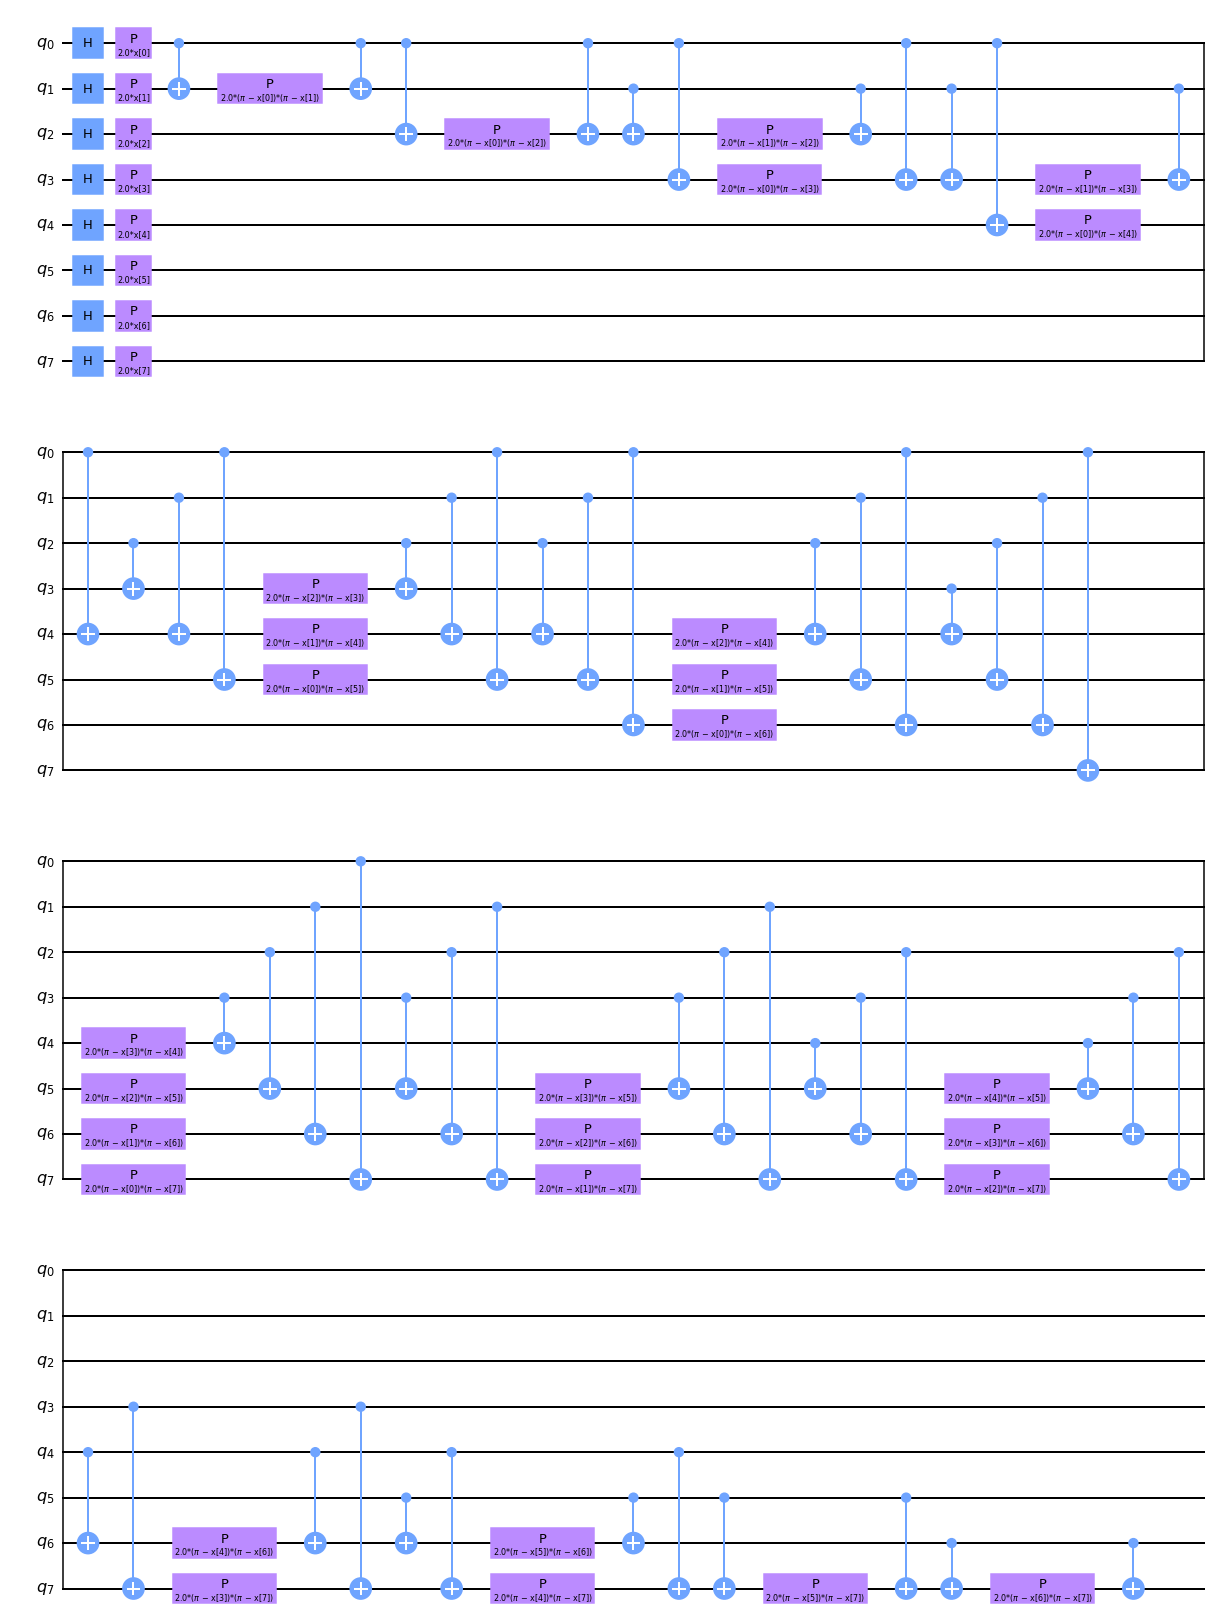

In [20]:
###################################################################################
# Quantum Machine Learning                                                        #
# 18/07/2023, Hecho por: David Castillo  - Campus Agramonte                       #
###################################################################################
from qiskit.utils import algorithm_globals
from qiskit.circuit.library import ZZFeatureMap

num_features = features.shape[1]
print('Columnas:', num_features)
feature_map = ZZFeatureMap(feature_dimension=num_features, reps=1)
feature_map.decompose().draw(output="mpl", fold=25)

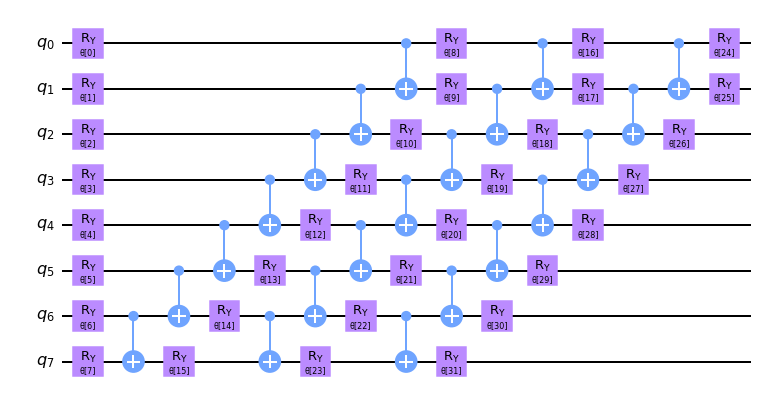

In [21]:
from qiskit.circuit.library import RealAmplitudes
ansatz = RealAmplitudes(num_qubits=num_features, reps=3)
ansatz.decompose().draw(output="mpl", fold=20)

In [22]:
from qiskit.algorithms.optimizers import COBYLA
optimizer = COBYLA(maxiter=1500)

In [23]:
from qiskit.primitives import Sampler
sampler = Sampler()

In [24]:
from matplotlib import pyplot as plt
from IPython.display import clear_output

objective_func_vals = []
plt.rcParams["figure.figsize"] = (12, 6)


def callback_graph(weights, obj_func_eval):
    clear_output(wait=True)
    objective_func_vals.append(obj_func_eval)
    plt.title("Objective function value against iteration")
    plt.xlabel("Iteration")
    plt.ylabel("Objective function value")
    plt.plot(range(len(objective_func_vals)), objective_func_vals)
    plt.show()

In [25]:
train_features.shape

(298, 8)

In [26]:
train_labels.shape

(298,)

In [ ]:
#!pip install qiskit-machine-learning

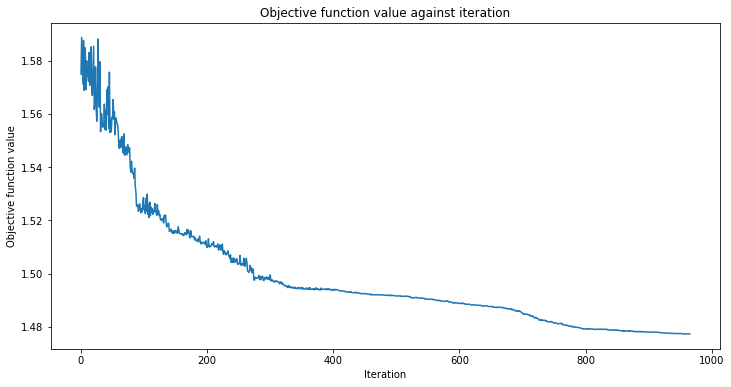

In [ ]:
import time

from qiskit_machine_learning.algorithms.classifiers import VQC


vqc = VQC(
    sampler=sampler,
    feature_map=feature_map,
    ansatz=ansatz,
    optimizer=optimizer,
    callback=callback_graph,
)

# clear objective value history
objective_func_vals = []

start = time.time()
vqc.fit(train_features, train_labels)
elapsed = time.time() - start

print(f"Training time: {round(elapsed)} seconds")

In [ ]:
train_score_q4_ra = vqc.score(train_features, train_labels)
test_score_q4_ra = vqc.score(test_features, test_labels)

print(f"Quantum VQC RealAmplitudes on the training dataset: {train_score_q4_ra:.2f}")
print(f"Quantum VQC RealAmplitudes on the test dataset:     {test_score_q4_ra:.2f}")



In [ ]:
from qiskit.circuit.library import EfficientSU2

ansatz = EfficientSU2(num_qubits=num_features, reps=3)
ansatz.decompose().draw(output="mpl", fold=20)

In [ ]:
import time
from qiskit_machine_learning.algorithms.classifiers import VQC

vqc = VQC(
    sampler=sampler,
    feature_map=feature_map,
    ansatz=ansatz,
    optimizer=optimizer,
    callback=callback_graph,
)

# clear objective value history
objective_func_vals = []

start = time.time()
vqc.fit(train_features, train_labels)
elapsed = time.time() - start

print(f"Training time: {round(elapsed)} seconds")

In [ ]:
train_score_q4_eff = vqc.score(train_features, train_labels)
test_score_q4_eff = vqc.score(test_features, test_labels)

print(f"Quantum VQC EfficientSU2 on the training dataset: {train_score_q4_eff:.2f}")
print(f"Quantum VQC EfficientSU2 on the test dataset:     {test_score_q4_eff:.2f}")

In [ ]:
###################################################################################
# Reducing the Number of Features With Principal Component Analysis (PCA)         #
# 20/06/2023, Hecho por: David Castillo  - Campus Agramonte                       #
###################################################################################
from sklearn.decomposition import PCA

features = PCA(n_components=2).fit_transform(features)

plt.rcParams["figure.figsize"] = (6, 6)
sns.scatterplot(x=features[:, 0], y=features[:, 1], hue=labels, palette="tab10")

In [ ]:
########################
#DESDE AUQI SON PRUEBAS#
########################

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Crear una instancia del codificador de etiquetas
label_encoder = LabelEncoder()

# Aplicar la codificación a la columna "Group"
data["Group"] = label_encoder.fit_transform(data["Group"])

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.impute import SimpleImputer

# Reemplaza "Group", "M/F", "Age", "EDUC", "SES", "MMSE", "CDR", "eTIV", "nWBV", "ASF" con los nombres reales de las columnas en tu base de datos
#features = data[["Group", "M/F", "Age", "EDUC", "SES", "MMSE", "CDR", "eTIV", "nWBV", "ASF"]]
#labels = data["Etiqueta"]  # Reemplaza "Etiqueta" con el nombre real de la columna de etiquetas en tu base de datos
features = data[['Age', 'EDUC', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV', 'ASF']]  # Reemplaza 'caracteristica1', 'caracteristica2', etc. por los nombres reales de las características en tu base de datos
labels = data['Group']  # Reemplaza 'etiqueta' por el nombre real de la columna de etiquetas en tu base de datos

# Dividir los datos en conjuntos de entrenamiento y prueba
train_features, test_features, train_labels, test_labels = train_test_split(
    features, labels, train_size=0.8, random_state=123
)
# Manejar los valores faltantes en los datos de entrenamiento y prueba si es necesario
imputer = SimpleImputer(strategy='mean')  # Puedes ajustar la estrategia según tus necesidades
train_features = imputer.fit_transform(train_features)
test_features = imputer.transform(test_features)

# Crear el modelo SVM
svc = SVC()

# Ajustar el modelo con los datos de entrenamiento
svc.fit(train_features, train_labels)

# Realizar predicciones en los datos de prueba
y_pred = svc.predict(test_features)

# Imprimir las predicciones
print(y_pred)


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Cargar la base de datos desde un archivo CSV
data = pd.read_csv(filename)

features = data[['Age','EDUC','SES','MMSE','CDR','eTIV','nWBV','ASF','Group']]  # Reemplaza 'caracteristica1', 'caracteristica2', etc. por los nombres reales de las características en tu base de datos
labels = data['Group']  # Reemplaza 'etiqueta' por el nombre real de la columna de etiquetas en tu base de datos

# Convertir las características y las etiquetas a arrays de NumPy
features_array = np.array(features)
labels_array = np.array(labels)

# Imprimir los arrays de características y etiquetas
print("Características:")
print(features_array)
print("Etiquetas:")
print(labels_array)
sns.pairplot(df, hue="Group", palette="tab10")

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Crear un DataFrame de ejemplo
data = pd.DataFrame({'Fruit': ['Apple', 'Banana', 'Orange', 'Apple', 'Orange']})

# Crear una instancia del codificador de etiquetas
label_encoder = LabelEncoder()

# Aplicar la codificación a la columna "Fruit"
data['Fruit_encoded'] = label_encoder.fit_transform(data['Fruit'])

# Mostrar el resultado
print(data)

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Crear un DataFrame de ejemplo
data = pd.DataFrame({'Group': ['Nondemented', 'Demented', 'Converted']})

# Crear una instancia del codificador de etiquetas
label_encoder = LabelEncoder()

# Aplicar la codificación a la columna "Fruit"
data['Group_encoded'] = label_encoder.fit_transform(data['Group'])

# Mostrar el resultado
print(data)

In [ ]:
features = data[['Age', 'EDUC', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV', 'ASF']]  s
labels = data['Group']  # Reemplaza 'etiqueta' por el nombre r

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from qiskit.utils import algorithm_globals

# Cargar la base de datos Iris
iris_data = load_iris()

# Obtener características (features) y etiquetas (labels)
features = iris_data.data
labels = iris_data.target

# Dividir los datos en conjuntos de entrenamiento y prueba
#train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size=0.2, random_state=42)
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, train_size=0.8, random_state=algorithm_globals.random_seed)

# Imprimir los valores de los conjuntos de entrenamiento y prueba
print("train_features:", train_features)
print("test_features:", test_features)
print("train_labels:", train_labels)
print("test_labels:", test_labels)

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from qiskit.utils import algorithm_globals
from sklearn.preprocessing import LabelEncoder
import os

# Especificar el directorio al que deseas cambiar
#directory = "/ruta/al/directorio"
directory = "C:/RESPALDOS/Investigación/Artículos/Articulo8/BDD/DataSets"

# Cambiar al directorio especificado
os.chdir(directory)

# Verificar el directorio actual
current_directory = os.getcwd()
print("Directorio actual:", current_directory)

import pandas as pd
# Cargar el archivo CSV
filename = "alzheimer.csv"
data = pd.read_csv(filename)

#print(data.head())

# Crear una instancia del codificador de etiquetas
label_encoder = LabelEncoder()

data['Group'] = data['Group'].replace({0: 'Converted', 1: 'Demented', 2: 'Nondemented'})
data['Group_encoder'] = label_encoder.fit_transform(data['Group'])
print(data)

data = data.fillna(data.mean())  # Reemplazar valores faltantes con la media

features = data[['Age', 'EDUC', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV', 'ASF']]  # Reemplaza 'caracteristica1', 'caracteristica2', etc. por los nombres reales de las características en tu base de datos
labels = data['Group_encoder']  # Reemplaza 'etiqueta' por el nombre real de la columna de etiquetas en tu base de datos

features = features.astype(int)
#features = features.round(2)

# Convertir las características y las etiquetas a arrays de NumPy
features_array = np.array(features)
labels_array = np.array(labels)


# Dividir los datos en conjuntos de entrenamiento y prueba
#train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size=0.2, random_state=42)
train_features, test_features, train_labels, test_labels = train_test_split(features_array, labels_array, train_size=0.8, random_state=algorithm_globals.random_seed)

#train_features = train_features.astype(int)
#train_features, test_features, train_labels, test_labels = train_test_split(features_array, labels_array, train_size=0.8, random_state=42)

# Imprimir los valores de los conjuntos de entrenamiento y prueba
print("train_features:", train_features)
print("test_features:", test_features)
print("train_labels:", train_labels)
print("test_labels:", test_labels)

